In [1]:
%matplotlib inline

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
import pathlib
from datetime import datetime
from citipy import citipy

from config import weather_api_key

In [2]:
rng = np.random.default_rng(seed=40)

In [3]:
# Create a set of random latitude and longitude combinations.
lats = rng.uniform(low=-90.0, high=90.0, size=1500)
lngs = rng.uniform(low=-180.0, high=180.0, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Create base_url by including the appid and units parameters
units = "imperial"
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for index, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.   
    city_url = f"{base_url}&q={city.replace(' ', '+')}"
    
    # Log the record and set count numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city.title()}")
    record_count += 1
    
    try:
        # Make a GET request and decode the response
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]

        # Append the city information into the city_data list.
        city_data.append({
            "City": city.title(),
            "Country": city_country,
            "Date": city_date,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind
        })
    except:
        print(f"{city.title()} not found. Skipping...")

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Nemuro
Processing Record 2 of Set 1 | Jumla
Processing Record 3 of Set 1 | Khatanga
Processing Record 4 of Set 1 | Taolanaro
Taolanaro not found. Skipping...
Processing Record 5 of Set 1 | Severo-Kurilsk
Processing Record 6 of Set 1 | Aklavik
Processing Record 7 of Set 1 | Puerto Ayora
Processing Record 8 of Set 1 | Prieska
Processing Record 9 of Set 1 | Airai
Processing Record 10 of Set 1 | Naugarzan
Naugarzan not found. Skipping...
Processing Record 11 of Set 1 | Ushuaia
Processing Record 12 of Set 1 | Punta Arenas
Processing Record 13 of Set 1 | Lompoc
Processing Record 14 of Set 1 | Hobart
Processing Record 15 of Set 1 | Port Alfred
Processing Record 16 of Set 1 | Saldanha
Processing Record 17 of Set 1 | Castro
Processing Record 18 of Set 1 | Cochrane
Processing Record 19 of Set 1 | Imeni Poliny Osipenko
Processing Record 20 of Set 1 | Chuy
Processing Record 21 of Set 1 | Rikitea
Processing R

In [9]:
city_data_df = pd.DataFrame(city_data)
# city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.count()

City          569
Country       569
Date          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
dtype: int64

In [8]:
# Create the output file (CSV).
output_data_file = pathlib.Path("weather_data/cities.csv")
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

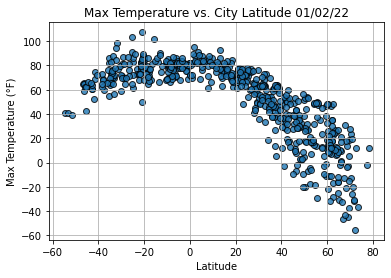

In [20]:
# Build the scatter plot for max temperature vs. latitude.
plt.scatter(
    lats,
    max_temps,
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Other graph properties.
plt.title(f"Max Temperature vs. City Latitude {time.strftime('%x')}")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("weather_data/max_temp_vs_latitude.png", bbox_inches="tight")
plt.savefig("weather_data/max_temp_vs_latitude.svg", bbox_inches="tight")

plt.show()

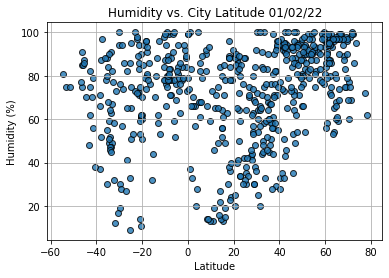

In [21]:
# Build the scatter plot for humidity vs latitude.
plt.scatter(
    lats,
    humidity,
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Other graph properties.
plt.title(f"Humidity vs. City Latitude {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("weather_data/humidity_vs_latitude.png", bbox_inches="tight")
plt.savefig("weather_data/humidity_vs_latitude.svg", bbox_inches="tight")

plt.show()

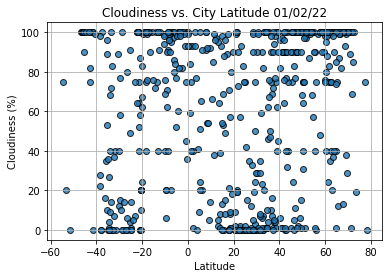

In [22]:
# Build the scatter plot for cloudiness vs latitude.
plt.scatter(
    lats,
    cloudiness,
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Other graph properties.
plt.title(f"Cloudiness vs. City Latitude {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("weather_data/cloudiness_vs_latitude.png", bbox_inches="tight")
plt.savefig("weather_data/cloudiness_vs_latitude.svg", bbox_inches="tight")

plt.show()

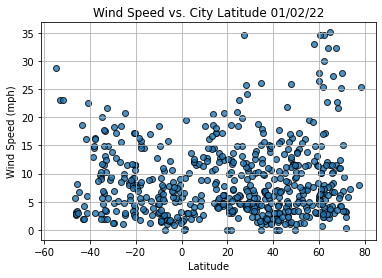

In [23]:
# Build the scatter plot for wind speed vs latitude.
plt.scatter(
    lats,
    wind_speed,
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Other graph properties.
plt.title(f"Wind Speed vs. City Latitude {time.strftime('%x')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("weather_data/wind_speed_vs_latitude.png", bbox_inches="tight")
plt.savefig("weather_data/wind_speed_vs_latitude.svg", bbox_inches="tight")

plt.show()